<a href="https://colab.research.google.com/github/AdreyanDistor/Taylor-Swift-Sentiment-Analysis/blob/main/TSWIFT_ANALYSIS_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Questions to answer:** What are the most popular songs in TSwift Discography? What words appear the most in them, and what emotions conveyed are the most popular songs?

# Preprocessing

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, chi2
from scipy.stats import pearsonr
from scipy.stats import binom
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

import altair as alt
from vega_datasets import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ts_spotify = pd.read_csv("/content/drive/MyDrive/TSwift/taylor_swift_spotify.csv")
ts_spotify = ts_spotify.drop("uri", axis = 1)
ts_spotify = ts_spotify.drop("Unnamed: 0", axis = 1).dropna()
ts_spotify = ts_spotify.drop("id", axis = 1)
ts_spotify[['year', 'month', 'day']] = ts_spotify['release_date'].str.split('-', expand=True).astype(int)
ts_spotify.head(40)

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,year,month,day
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.6850,79,212600,2023,10,27
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.7010,79,231833,2023,10,27
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.3050,80,231000,2023,10,27
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.2060,79,235800,2023,10,27
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.5200,78,193289,2023,10,27
5,Shake It Off (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,6,0.012100,0.636,0.808,0.000022,0.3590,-5.693,0.0729,160.058,0.9170,77,219209,2023,10,27
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,7,0.003540,0.670,0.858,0.000013,0.0687,-6.528,0.0439,118.009,0.5390,77,207650,2023,10,27
7,Bad Blood (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,8,0.036200,0.618,0.683,0.000000,0.3050,-6.438,0.1940,169.971,0.3630,77,211103,2023,10,27
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,9,0.043600,0.589,0.674,0.000072,0.1120,-7.480,0.0656,139.985,0.5140,77,220433,2023,10,27
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,10,0.001960,0.758,0.691,0.000011,0.0939,-5.798,0.0515,119.997,0.5380,77,247533,2023,10,27


# ***Data Exploration***

In [ ]:
ts_spotify.head()
popularity_album = ts_spotify.groupby('album')['popularity'].mean()
popularity_album = pd.DataFrame.from_dict(popularity_album)
print(popularity_album[popularity_album.popularity == popularity_album.popularity.max()])

                         popularity
album                              
1989 (Taylor's Version)   85.047619


**Observation:** The most popular album seems to be 1989 (Taylor's Version)

1989 (Taylor's Version)
Fearless (Taylor's Version)
Live From Clear Channel Stripped 2008
Lover
Midnights
Red (Taylor's Version)
Speak Now (Taylor's Version)
Taylor Swift
evermore
folklore
folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]
reputation


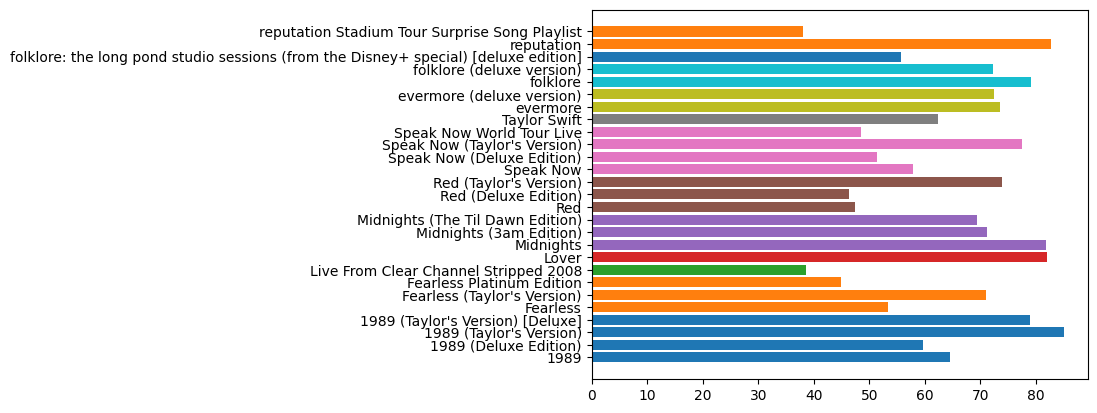

In [ ]:
grouping_key = popularity_album.index.str.split().str[0]
grouped_df = popularity_album.groupby(grouping_key)

for name, group in grouped_df:
    plt.barh(group.index, group['popularity'].astype(float))
    print(group['popularity'].idxmax())


**Observation:** The albums where the **Deluxe** or **Taylor's Version** are more popular are *Fearless, 1989, Red, Speak Now*.

<ipython-input-6-044cf32a5b2f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ts_spotify.corr()


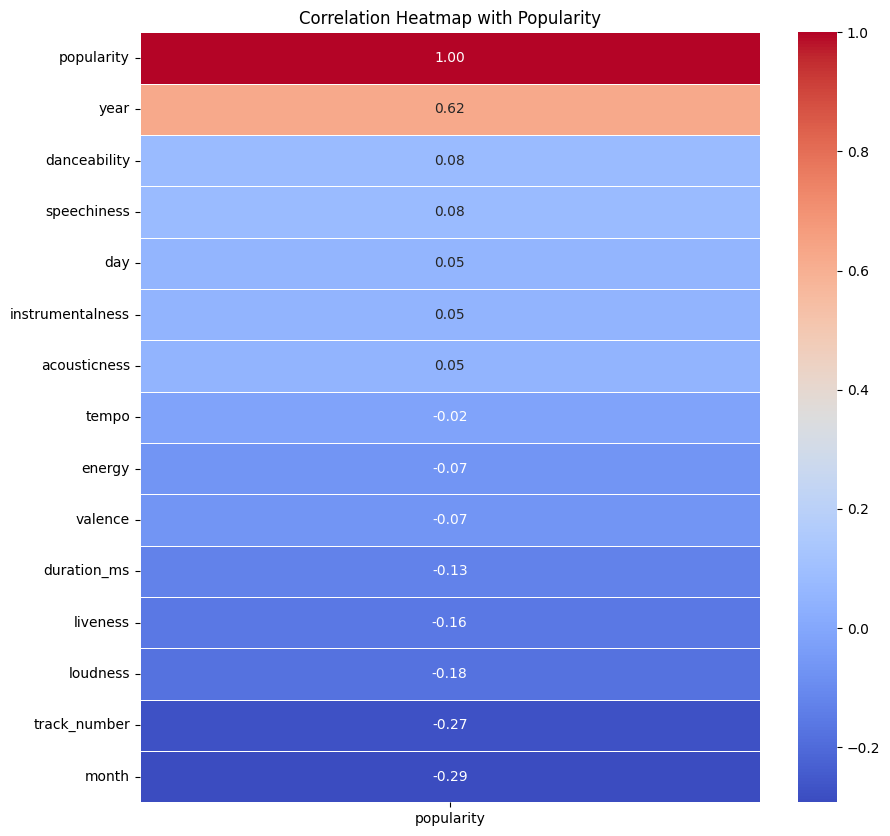

In [ ]:
correlation_matrix = ts_spotify.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with Popularity')
plt.show()

**Observation:** The correlation heatmap shows that popularity has no significant correlation between popularity and other features. Except for the year. The reason for this correlation could be that this data comes from Spotifty streams. The increase in popularity could come from Spotify's user base growth over the years.

# Chi Square Analysis

In [ ]:

import scipy.stats

acoustic_loudness_table = pd.crosstab(ts_spotify['year'], ts_spotify['popularity'])
chi2, p, dof, expected = chi2_contingency(acoustic_loudness_table)
crit_val = scipy.stats.chi2.ppf(.95, dof)
print("chi square:", chi2)
print("p-value:", p)
print("expected: ", expected)
print("critical value:", crit_val)
if chi2 > crit_val and p < .5:
  print("\nSignificantly Correlated")


chi square: 1456.1127225605233
p-value: 4.1010850479478213e-69
expected:  [[0.05660377 0.28301887 0.16981132 0.05660377 0.25471698 0.14150943
  0.19811321 0.11320755 0.16981132 0.11320755 0.25471698 0.16981132
  0.31132075 0.28301887 0.28301887 0.25471698 0.25471698 0.22641509
  0.19811321 0.14150943 0.16981132 0.39622642 0.31132075 0.16981132
  0.16981132 0.14150943 0.31132075 0.31132075 0.19811321 0.16981132
  0.19811321 0.05660377 0.08490566 0.22641509 0.22641509 0.31132075
  0.45283019 0.36792453 0.6509434  0.56603774 0.48113208 0.39622642
  0.39622642 0.25471698 0.36792453 0.50943396 0.39622642 0.22641509
  0.39622642 0.36792453 0.39622642 0.25471698 0.22641509 0.31132075
  0.08490566 0.14150943 0.05660377 0.05660377 0.05660377 0.08490566
  0.05660377 0.02830189 0.02830189]
 [0.1509434  0.75471698 0.45283019 0.1509434  0.67924528 0.37735849
  0.52830189 0.30188679 0.45283019 0.30188679 0.67924528 0.45283019
  0.83018868 0.75471698 0.75471698 0.67924528 0.67924528 0.60377358
  0.52

**Observation:** Because the p value is less then .5, and the chi squared value is greater then the critical value, the year and popularity are signficantly correlated.

# Preprocessing Data for Sentiment Analysis

In [ ]:
ts_genius = pd.read_csv("/content/drive/MyDrive/TSwift/taylor_swift_genius_data.csv")
ts_genius

,index,Album,Song Name,Lyrics
0,0,Taylor Swift,Mary's Song (Oh My My My),She said I was seven and you were nine I looke...
1,1,Taylor Swift,A Perfectly Good Heart,Why would you wanna break A perfectly good hea...
2,2,Taylor Swift,Tim McGraw,He said the way my blue eyes shined Put those ...
3,3,Taylor Swift,Teardrops On My Guitar,Drew looks at me I fake a smile so he won't se...
4,4,Taylor Swift,Cold as You,You have a way of coming easily to me And when...
...,...,...,...,...
142,150,Midnights,Question...?,"I remember Good girl, sad boy Big city, wrong..."
143,151,Midnights,Bejeweled,"Baby love, I think I've been a little too kind..."
144,152,Midnights,Snow On the Beach,"One night, a few moons ago I saw flecks of wha..."
145,153,Midnights,Midnight Rain,"Rain He wanted it comfortable, I wanted that p..."


## We use this function to add the lyrics from the dataset above to the Spotify data

In [ ]:
def add_matched(main_df, other_df, new_col_name, comparison_col1, comparison_col2, extractcol_2):
  main_df[new_col_name] = np.nan
  for index, row in main_df.iterrows():
    result = other_df.loc[other_df[comparison_col2] == row[comparison_col1], extractcol_2]
    if not result.empty:
     main_df.at[index, new_col_name] = result.iloc[0]

  return main_df

ts_df = ts_popular_sorted.copy()
ts_df = add_matched(ts_df, ts_genius, 'lyrics', 'name', 'Song Name', 'Lyrics').dropna()
ts_df = ts_df.reset_index()

# PreProcessing for Sentiment Analysis

In [ ]:
import nltk
from nltk.util import ngrams
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
example = ts_df['lyrics'][0]
tokens = nltk.word_tokenize(example)
tokens[:10]

['(', 'Yeah', ',', 'yeah', ',', 'yeah', ',', 'yeah', ')', 'Fever']

In [ ]:
tagged = nltk.pos_tag(tokens)

entities = nltk.chunk.ne_chunk(tagged)
# entities.pprint()

(S
  (/(
  Yeah/UH
  ,/,
  yeah/UH
  ,/,
  yeah/UH
  ,/,
  yeah/UH
  )/)
  Fever/NNP
  dream/NN
  high/RB
  in/IN
  the/DT
  quiet/NN
  of/IN
  the/DT
  night/NN
  You/PRP
  know/VBP
  that/IN
  I/PRP
  caught/VBD
  it/PRP
  (/(
  Oh/NNP
  yeah/RB
  ,/,
  you/PRP
  're/VBP
  right/JJ
  ,/,
  I/PRP
  want/VBP
  it/PRP
  )/)
  Bad/NNP
  ,/,
  bad/JJ
  boy/NN
  ,/,
  shiny/JJ
  toy/NN
  with/IN
  a/DT
  price/NN
  You/PRP
  know/VBP
  that/IN
  I/PRP
  bought/VBD
  it/PRP
  (/(
  Oh/NNP
  yeah/RB
  ,/,
  you/PRP
  're/VBP
  right/JJ
  ,/,
  I/PRP
  want/VBP
  it/PRP
  )/)
  Killing/VBG
  me/PRP
  slow/VB
  ,/,
  out/IN
  the/DT
  window/NN
  I/PRP
  'm/VBP
  always/RB
  waiting/VBG
  for/IN
  you/PRP
  to/TO
  be/VB
  waiting/VBG
  below/IN
  (GPE Devils/NNP)
  roll/VBP
  the/DT
  dice/NNS
  ,/,
  angels/NNS
  roll/VBP
  their/PRP$
  eyes/NNS
  What/WP
  does/VBZ
  n't/RB
  kill/VB
  me/PRP
  makes/VBZ
  me/PRP
  want/VB
  you/PRP
  more/JJR
  And/CC
  it/PRP
  's/VBZ
  new/JJ
  ,/,
  the

## Sentiment Scoring using VADER - bag of words approach
### 1. Stop words are removed
### 2. each word is sored and combined to total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()


In [ ]:
res = {}
k = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    lyric = row['lyrics']
    name = row['name']
    album = row['album']
    res[name + '- (' + album + ')'] = sia.polarity_scores(lyric)


100%|██████████| 206/206 [00:00<00:00, 266.03it/s]


In [ ]:
pd.DataFrame(res).T

,neg,neu,pos,compound
Cruel Summer- (Lover),0.171,0.658,0.170,-0.9115
Lover- (Lover),0.035,0.743,0.222,0.9960
Karma- (Midnights),0.173,0.682,0.145,-0.7819
Delicate- (reputation),0.055,0.771,0.174,0.9944
Look What You Made Me Do- (reputation),0.119,0.806,0.074,-0.9710
...,...,...,...,...
Starlight- (reputation Stadium Tour Surprise Song Playlist),0.041,0.735,0.224,0.9967
Treacherous- (reputation Stadium Tour Surprise Song Playlist),0.092,0.830,0.078,-0.4434
White Horse- (reputation Stadium Tour Surprise Song Playlist),0.047,0.874,0.078,0.9075
Forever & Always- (reputation Stadium Tour Surprise Song Playlist),0.090,0.868,0.042,-0.9640


In [ ]:
vaders_result = pd.DataFrame(res).T
vaders_result = vaders_result.reset_index().rename(columns={'index': 'name'})
df_cpy = df.copy()
df_cpy['name'] = df['name'] + '- (' + df_cpy['album'] + ')'
vaders_result = df_cpy.merge(vaders_result, how = 'left')
vaders_result

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,...,popularity,duration_ms,year,month,day,lyrics,neg,neu,pos,compound
0,Cruel Summer- (Lover),Lover,2019-08-23,2,0.1170,0.552,0.702,0.000021,0.1050,-5.707,...,99,178426,2019,8,23,"(Yeah, yeah, yeah, yeah) Fever dream high in ...",0.171,0.658,0.170,-0.9115
1,Lover- (Lover),Lover,2019-08-23,3,0.4920,0.359,0.543,0.000016,0.1180,-7.582,...,92,221306,2019,8,23,We could leave the Christmas lights up 'til Ja...,0.035,0.743,0.222,0.9960
2,Karma- (Midnights),Midnights,2022-10-21,11,0.0734,0.642,0.620,0.000000,0.4830,-7.091,...,88,204852,2022,10,21,You're talking shit for the hell of it Addicte...,0.173,0.682,0.145,-0.7819
3,Delicate- (reputation),reputation,2017-11-10,5,0.2160,0.750,0.404,0.000357,0.0911,-10.178,...,87,232253,2017,11,10,This ain't for the best My reputation's never ...,0.055,0.771,0.174,0.9944
4,Look What You Made Me Do- (reputation),reputation,2017-11-10,6,0.2040,0.766,0.709,0.000014,0.1260,-6.471,...,87,211853,2017,11,10,I don't like your little games Don't like your...,0.119,0.806,0.074,-0.9710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Starlight- (reputation Stadium Tour Surprise S...,reputation Stadium Tour Surprise Song Playlist,2017-11-09,45,0.0192,0.649,0.777,0.000487,0.2340,-5.797,...,33,220600,2017,11,9,"I said, ""Oh, my, what a marvelous tune"" It was...",0.041,0.735,0.224,0.9967
202,Treacherous- (reputation Stadium Tour Surprise...,reputation Stadium Tour Surprise Song Playlist,2017-11-09,20,0.1010,0.704,0.621,0.000004,0.1400,-8.086,...,33,242760,2017,11,9,Put your lips close to mine As long as they do...,0.092,0.830,0.078,-0.4434
203,White Horse- (reputation Stadium Tour Surprise...,reputation Stadium Tour Surprise Song Playlist,2017-11-09,43,0.3140,0.578,0.348,0.000000,0.1000,-8.066,...,33,235400,2017,11,9,"Say you're sorry, that face of an angel Comes ...",0.047,0.874,0.078,0.9075
204,Forever & Always- (reputation Stadium Tour Sur...,reputation Stadium Tour Surprise Song Playlist,2017-11-09,39,0.0806,0.607,0.829,0.000000,0.2070,-5.020,...,33,226293,2017,11,9,Once upon a time I believe it was a Tuesday wh...,0.090,0.868,0.042,-0.9640


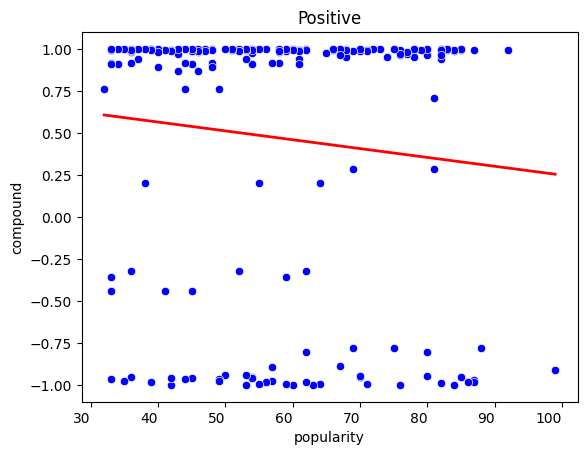

In [ ]:
sns.scatterplot(data=vaders_result, x='popularity', y='compound', color='blue')
plt.xticks(rotation=0, ha='right', fontsize=10)
coeff, intercept = np.polyfit(vaders_result['popularity'], vaders_result['compound'], 1)
line = coeff * vaders_result['popularity'].astype(int) + intercept
plt.plot(vaders_result['popularity'], line, color='red', linewidth=2, label='Linear Regression')
plt.title('Positive')

plt.show()

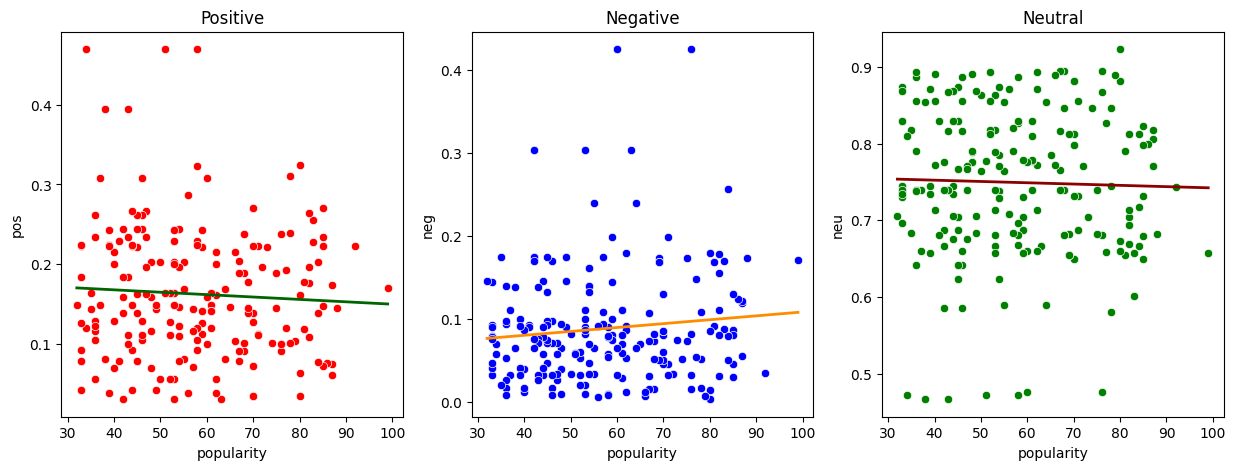

In [ ]:
figs, axs = plt.subplots(1,3, figsize = (15,5))
vaders_result['popularity'] = vaders_result['popularity'].astype(int)
sns.scatterplot(data=vaders_result, x='popularity', y='pos', color='red', ax = axs[0])
sns.scatterplot(data=vaders_result, x='popularity', y='neg', color='blue', ax = axs[1])
sns.scatterplot(data=vaders_result, x='popularity', y='neu', color='green', ax = axs[2])


coeff, intercept = np.polyfit(vaders_result['popularity'], vaders_result['pos'], 1)
line = coeff * vaders_result['popularity'].astype(int) + intercept
axs[0].plot(vaders_result['popularity'], line, color='darkgreen', linewidth=2, label='Linear Regression')
axs[0].set_title('Positive')

coeff, intercept = np.polyfit(vaders_result['popularity'], vaders_result['neg'], 1)
line = coeff * vaders_result['popularity'].astype(int) + intercept
axs[1].plot(vaders_result['popularity'], line, color='darkorange', linewidth=2, label='Linear Regression')
axs[1].set_title('Negative')

coeff, intercept = np.polyfit(vaders_result['popularity'], vaders_result['neu'], 1)
line = coeff * vaders_result['popularity'].astype(int) + intercept
axs[2].plot(vaders_result['popularity'], line, color='darkred', linewidth=2, label='Linear Regression')
axs[2].set_title('Neutral')
plt.show()


In [ ]:
#Roberta PreTrainedModel

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
example = df_cpy['lyrics'][20]
print(example)
sia.polarity_scores(example)

I blew things out of proportion, now you're blue Put you in jail for something you didn’t do I pinned your hands behind your back, oh Thought I had reason to attack, but no  Fighting with a true love is boxing with no gloves Chemistry 'til it blows up, 'til there’s no us Why'd I have to break what I love so much? It's on your face, and I'm to blame, I need to say Hey, it's all me, in my head I'm the one who burned us down But it's not what I meant Sorry that I hurt you I don't wanna do, I don’t wanna do this to you (Ooh) I don’t wanna lose, I don't wanna lose this with you (Ooh) I need to say, hey, it’s all me, just don't go Meet me in the afterglow  It's so excruciating to see you low Just wanna lift you up and not let you go This ultraviolet morning light below Tells me this love is worth the fight, oh  I lived like an island, punished you with silence Went off like sirens, just crying Why'd I have to break what I love so much? It’s on your face, don't walk away, I need to say  Hey, 

{'neg': 0.178, 'neu': 0.713, 'pos': 0.108, 'compound': -0.9861}

In [ ]:
import torch
import torch.nn.functional as F

def polarity_scores_roberta(data):
    encoded_text = tokenizer(data, return_tensors='pt')
    tokenizer.model_max_length = 256
    input_ids = encoded_text['input_ids']
    attention_mask = encoded_text['attention_mask']
    input_ids_padded = F.pad(input_ids, (0, 256 - input_ids.size(1)), value=tokenizer.pad_token_id)
    attention_mask_padded = F.pad(attention_mask, (0, 256 - attention_mask.size(1)), value=0)
    output = model(input_ids_padded, attention_mask_padded)
    scores = output[0][0].detach().numpy()
    scores = F.softmax(torch.tensor(scores), dim=0)
    scores = scores.numpy()

    scores_dict = {
        'rob_neg': scores[0],
        'rob_neu': scores[1],
        'rob_pos': scores[2]
    }
    return scores_dict


In [ ]:
res = {}
k = 0


for i, row in tqdm(df_cpy.iterrows(), total=len(df)):
    try:
        lyric = row['lyrics']
        name = row['name']
        album = row['album']
        vader_res = sia.polarity_scores(lyric)
        vader_rename = {}
        for id, val in vader_res.items():
            vader_rename[f"vader_{id}"] = val
        roberta_res = polarity_scores_roberta(lyric)
        both = {**vader_rename, **roberta_res}
        res[name] = both
    except RuntimeError:
        print(f"Didn't work at {name}")

100%|██████████| 206/206 [05:07<00:00,  1.49s/it]


In [ ]:
res_df = pd.DataFrame(res).T
res_df = res_df.reset_index().rename(columns={'index': 'name'})
res_df = res_df.merge(df_cpy, how = 'left')
res_df

,name,vader_neg,vader_neu,vader_pos,vader_compound,rob_neg,rob_neu,rob_pos,album,release_date,...,loudness,speechiness,tempo,valence,popularity,duration_ms,year,month,day,lyrics
0,Cruel Summer- (Lover),0.171,0.658,0.170,-0.9115,0.298233,0.516970,0.184798,Lover,2019-08-23,...,-5.707,0.1570,169.994,0.5640,99,178426,2019,8,23,"(Yeah, yeah, yeah, yeah) Fever dream high in ..."
1,Lover- (Lover),0.035,0.743,0.222,0.9960,0.108979,0.628448,0.262573,Lover,2019-08-23,...,-7.582,0.0919,68.534,0.4530,92,221306,2019,8,23,We could leave the Christmas lights up 'til Ja...
2,Karma- (Midnights),0.173,0.682,0.145,-0.7819,0.281544,0.473937,0.244518,Midnights,2022-10-21,...,-7.091,0.0666,90.020,0.0969,88,204852,2022,10,21,You're talking shit for the hell of it Addicte...
3,Delicate- (reputation),0.055,0.771,0.174,0.9944,0.181805,0.532314,0.285880,reputation,2017-11-10,...,-10.178,0.0682,95.045,0.0499,87,232253,2017,11,10,This ain't for the best My reputation's never ...
4,Look What You Made Me Do- (reputation),0.119,0.806,0.074,-0.9710,0.484484,0.417957,0.097559,reputation,2017-11-10,...,-6.471,0.1230,128.070,0.5060,87,211853,2017,11,10,I don't like your little games Don't like your...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Starlight- (reputation Stadium Tour Surprise S...,0.041,0.735,0.224,0.9967,0.070087,0.469885,0.460028,reputation Stadium Tour Surprise Song Playlist,2017-11-09,...,-5.797,0.0391,126.014,0.6160,33,220600,2017,11,9,"I said, ""Oh, my, what a marvelous tune"" It was..."
202,Treacherous- (reputation Stadium Tour Surprise...,0.092,0.830,0.078,-0.4434,0.269519,0.603916,0.126565,reputation Stadium Tour Surprise Song Playlist,2017-11-09,...,-8.086,0.0334,109.995,0.3950,33,242760,2017,11,9,Put your lips close to mine As long as they do...
203,White Horse- (reputation Stadium Tour Surprise...,0.047,0.874,0.078,0.9075,0.285962,0.582043,0.131995,reputation Stadium Tour Surprise Song Playlist,2017-11-09,...,-8.066,0.0257,92.673,0.2180,33,235400,2017,11,9,"Say you're sorry, that face of an angel Comes ..."
204,Forever & Always- (reputation Stadium Tour Sur...,0.090,0.868,0.042,-0.9640,0.408543,0.527816,0.063641,reputation Stadium Tour Surprise Song Playlist,2017-11-09,...,-5.020,0.0588,128.057,0.5200,33,226293,2017,11,9,Once upon a time I believe it was a Tuesday wh...


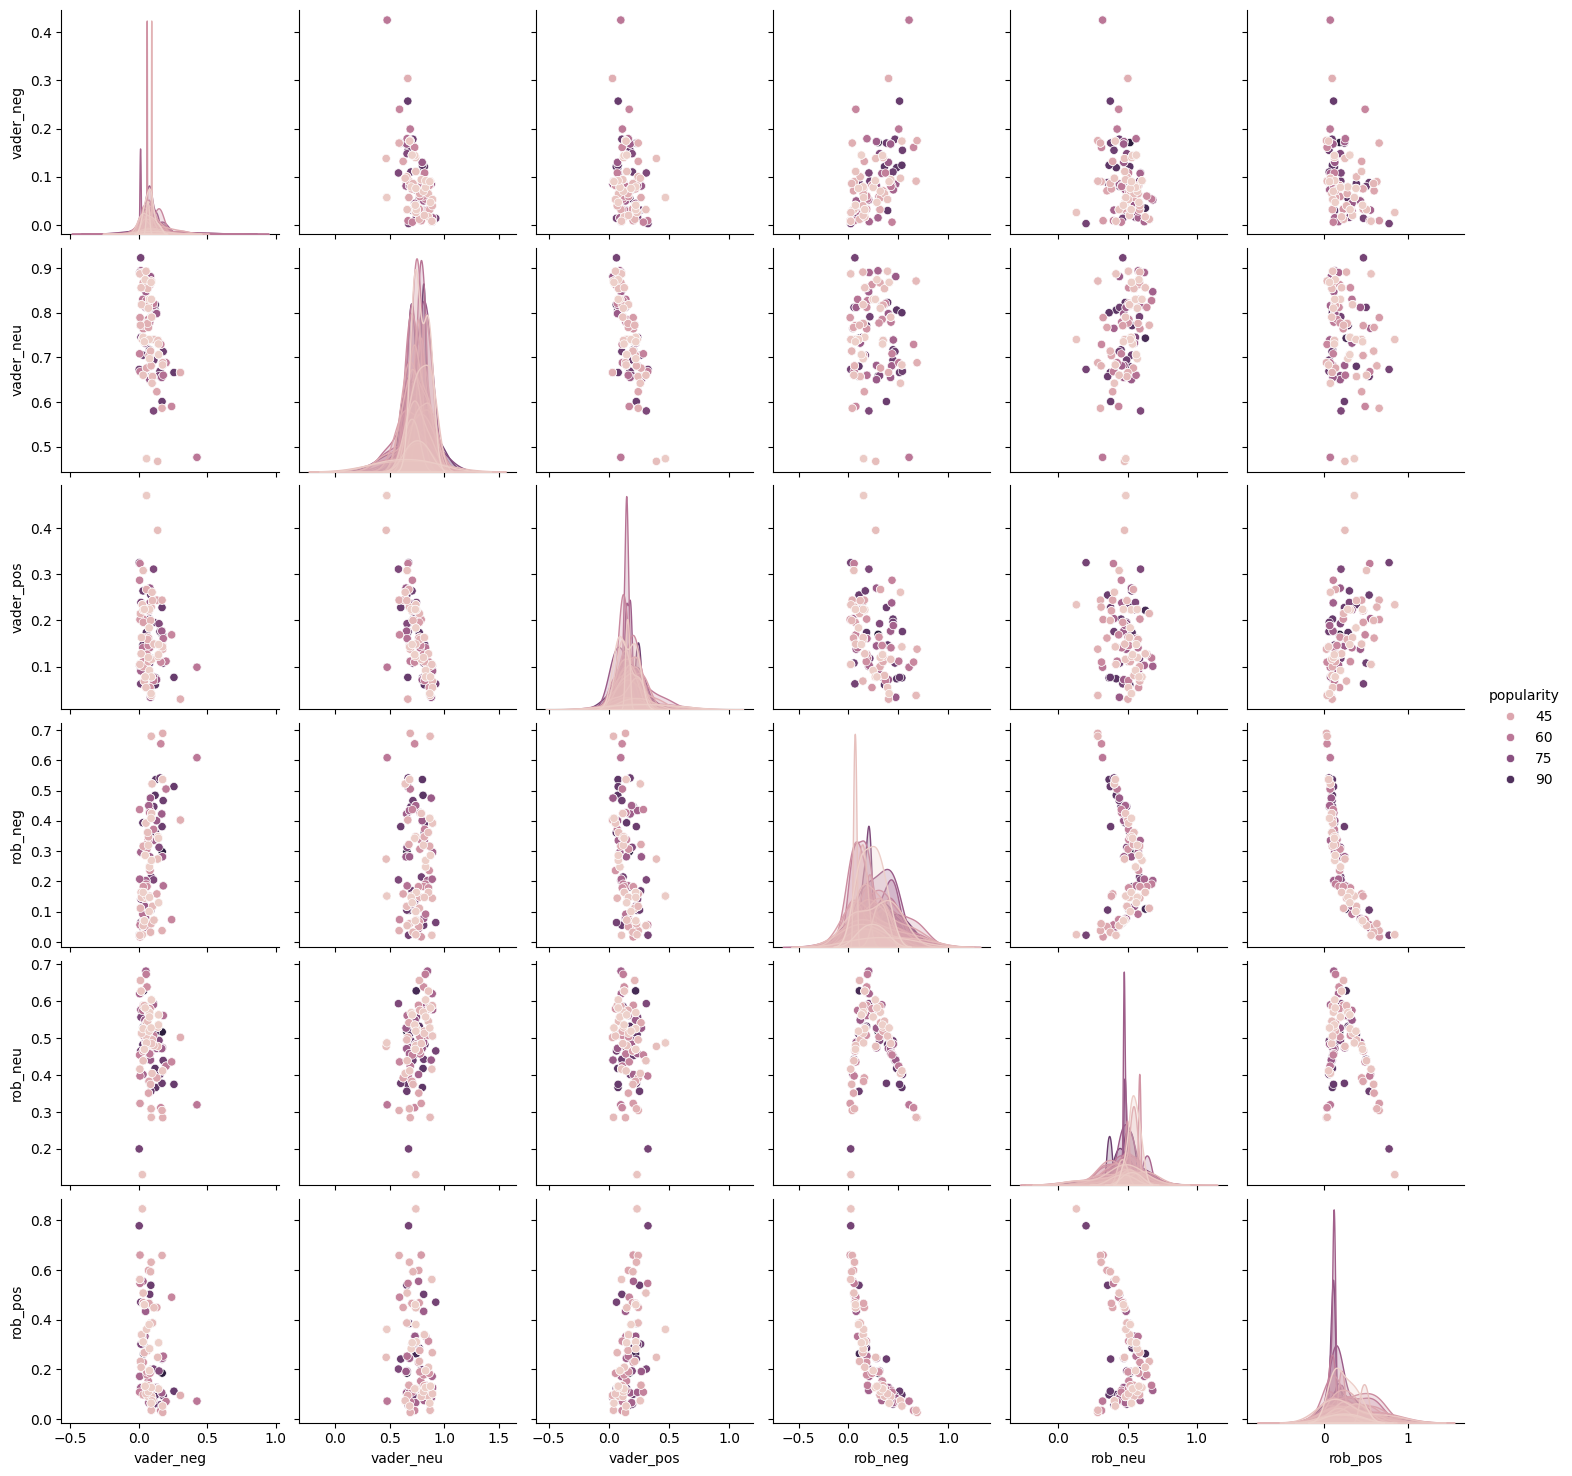

In [ ]:
sns.pairplot(data=res_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'rob_neg', 'rob_neu', 'rob_pos'], hue='popularity')


# Positive Values

In [ ]:
#Popularity < 40 and song with greatests positivity using roberta model
res_df.query('popularity < 40').sort_values('rob_pos', ascending=False)['lyrics'].values[0]

"I'm five years old, it's getting cold, I've got my big coat on I hear your laugh and look up smiling at you, I run and run Past the pumpkin patch and the tractor rides Look now, the sky is gold I hug your legs and fall asleep on the way home  I don't know why all the trees change in the fall But I know you're not scared of anything at all Don't know if Snow White's house is near or far away But I know I had the best day with you today I'm thirteen now And don't know how my friends could be so mean I come home crying and you hold me tight and grab the keys And we drive and drive until we found a town far enough away And we talk and window shop 'til I've forgotten all their names  I don't know who I'm going to talk to now at school But I know I'm laughing on the car ride home with you Don't know how long it's going to take to feel okay But I know I had the best day with you today  I have an excellent father, his strength is making me stronger God smiles on my little brother, inside and 

In [ ]:
#Popularity < 40 and song with greatests positivity using vader model
res_df.query('popularity < 40').sort_values('vader_pos', ascending=False)['lyrics'].values[0]

"Clear blue water High tide came and brought you in And I could go on and on, on and on and I will Skies grew darker Currents swept you out again And you were just gone and gone, gone and gone  In silent screams and wildest dreams I never dreamed of this This love is good, this love is bad This love is alive back from the dead, oh-oh, oh These hands had to let it go free, and This love came back to me, oh-oh, oh Oh-oh, oh-oh, oh  Tossing, turning Struggled through the night with someone new Baby, I could go on and on, on and on Lantern, burning Flickered in my mind, only you But you were still gone, gone, gone  Been losing grip on sinking ships You showed up just in time  This love is good, this love is bad This love is alive back from the dead, oh-oh, oh These hands had to let it go free, and This love came back to me, oh-oh, oh This love left a permanent mark This love is glowing in the dark, oh-oh, oh These hands had to let it go free, and This love came back to me, oh-oh, oh You mi

# Negative Values

In [ ]:
#Popularity > 70 and song with greatests negativity using roberta model
res_df.query('popularity > 70').sort_values('rob_neg', ascending=False)['lyrics'].values[0]

'I stay out too late Got nothin\' in my brain That\'s what people say, mmm-mmm That\'s what people say, mmm-mmm I go on too many dates (Haha) But I can\'t make them stay At least that\'s what people say, mmm-mmm That\'s what people say, mmm-mmm  But I keep cruisin\' Can\'t stop, won\'t stop movin\' It\'s like I got this music in my mind Sayin\', "It\'s gonna be alright" \'Cause the players gonna play, play, play, play, play And the haters gonna hate, hate, hate, hate, hate Baby, I\'m just gonna shake, shake, shake, shake, shake I shake it off, I shake it off Heartbreakers gonna break, break, break, break, break And the fakers gonna fake, fake, fake, fake, fake Baby, I\'m just gonna shake, shake, shake, shake, shake I shake it off, I shake it off  I never miss a beat I\'m lightnin\' on my feet And that\'s what they don\'t see, mmm-mmm That\'s what they don\'t see, mmm-mmm I\'m dancin\' on my own (Dancin\' on my own) I make the moves up as I go (Moves up as I go) And that\'s what they do

In [ ]:
#Popularity > 70 and song with greatests negativity using vader model
res_df.query('popularity > 70').sort_values('vader_neg', ascending=False)['lyrics'].values[0]

'I stay out too late Got nothin\' in my brain That\'s what people say, mmm-mmm That\'s what people say, mmm-mmm I go on too many dates (Haha) But I can\'t make them stay At least that\'s what people say, mmm-mmm That\'s what people say, mmm-mmm  But I keep cruisin\' Can\'t stop, won\'t stop movin\' It\'s like I got this music in my mind Sayin\', "It\'s gonna be alright" \'Cause the players gonna play, play, play, play, play And the haters gonna hate, hate, hate, hate, hate Baby, I\'m just gonna shake, shake, shake, shake, shake I shake it off, I shake it off Heartbreakers gonna break, break, break, break, break And the fakers gonna fake, fake, fake, fake, fake Baby, I\'m just gonna shake, shake, shake, shake, shake I shake it off, I shake it off  I never miss a beat I\'m lightnin\' on my feet And that\'s what they don\'t see, mmm-mmm That\'s what they don\'t see, mmm-mmm I\'m dancin\' on my own (Dancin\' on my own) I make the moves up as I go (Moves up as I go) And that\'s what they do

In [ ]:
ratio = len(res_df[res_df['popularity'] >= 70]) / len(res_df)
ratio

0.2669902912621359

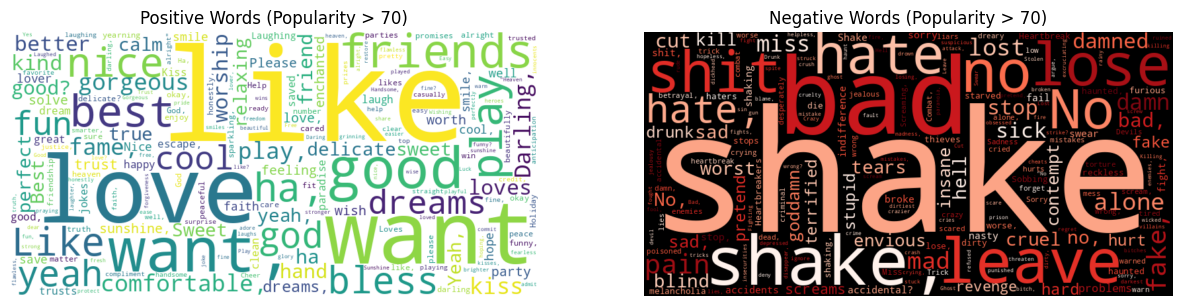

In [ ]:
from wordcloud import WordCloud
from collections import Counter

sia = SentimentIntensityAnalyzer()
positive_words = []
negative_words = []

for row_text, popularity_score in zip(res_df['lyrics'], res_df['popularity']):
    for word in row_text.split():
        sentiment_score = sia.polarity_scores(word)['compound']
        if sentiment_score > 0 and popularity_score >= 70:
            positive_words.append(word)
        elif sentiment_score < 0 and popularity_score >= 70:
            negative_words.append(word)

positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_counts)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate_from_frequencies(negative_word_counts)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Words (Popularity > 70)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Words (Popularity > 70)')
plt.axis('off')

plt.show()


# ***Overall Conclusion:***

---



The sentiment analysis of song lyrics and analysis of the year songs were released has provided some valuable insights into how these effect the popularity of a song. The positive correlation identified between popularity and year can be explained with Spotify's increasing user base. U

This project has not provided statistical evidence but taht popularity is effected by the sentiment of song lyrics. We may have to create our own model to identify more complex subject matter.
